# 회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1) 파일을 읽어 데이터프레임을 생성하고 처음 3개의 샘플을 출력하시오. 특성의 개수와 샘플(관측치)의 개수를 구하고 결측치가 있는지 알아보시오. 수치형 특성과 범주형 특성은 무엇인지 파악하시오.

In [2]:
# 방법 1
with open('HW3.csv') as f:
    for _ in range(3):
        print(f.readline())

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance

1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333

2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903



In [3]:
# 방법 2
df = pd.read_csv('HW3.csv', index_col=0)

In [4]:
df.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [5]:
df.info() # 샘플 개수 400개

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [6]:
df.isnull().sum() # 결측치 없음

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [7]:
df.columns # 특성 수 10개

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [8]:
df.describe() # 수치형 특성 : Income, Limit, Rating, Cards, Age, Education, Balance

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


#### 범주형 특성 : Gender, Student, Married, Ethnicity
* 특성의 개수는 10개, 관측치는 400개 이며 결측치는 없다.
* 수치형 특성 : Income, Limit, Rating, Cards, Age, Education
* 범주형 특성 : Gender, Student, Married, Ethnicity

In [9]:
# 특성 다 뽑는법
feat = [name for name in df.columns if name != 'Balance'] # Balance가 레이블인가
feat

['Income',
 'Limit',
 'Rating',
 'Cards',
 'Age',
 'Education',
 'Gender',
 'Student',
 'Married',
 'Ethnicity']

In [10]:
# 범주형 특성 뽑는법
cat_feat = [name for name in feat if df[name].dtype == 'object']
cat_feat

['Gender', 'Student', 'Married', 'Ethnicity']

In [11]:
# 수치형 특성 뽑는법

In [12]:
num_feat = [name for name in feat if name not in cat_feat]
num_feat

['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']

### 2) 수치형 특성과 레이블에 대하여는 히스토그램을 작성하고 범주형 특성에 대하여는 막대그래프를 작성하고 간단히 코멘트 하시오.

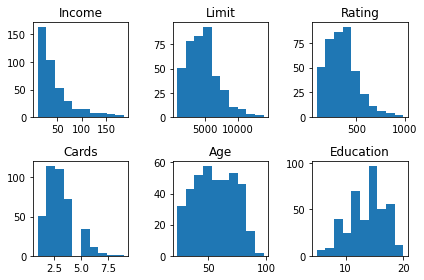

In [13]:
# 수치형 특성과 레이블 (['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']) -> 히스토그램
plt.subplot(2,3,1)
plt.hist(df.Income,label=df.Balance)
plt.title("Income")
plt.subplot(2,3,2)
plt.hist(df.Limit,label=df.Balance)
plt.title("Limit")
plt.subplot(2,3,3)
plt.hist(df.Rating,label=df.Balance)
plt.title("Rating")
plt.subplot(2,3,4)
plt.hist(df.Cards,label=df.Balance)
plt.title("Cards")
plt.subplot(2,3,5)
plt.hist(df.Age,label=df.Balance)
plt.title("Age")
plt.subplot(2,3,6)
plt.hist(df.Education,label=df.Balance)
plt.title("Education")
plt.tight_layout() # 자동으로 레이아웃을 맞춰주는 함수

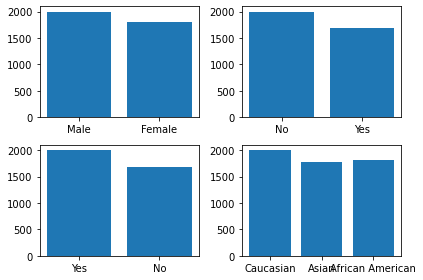

In [14]:
# 범주형 특성과 레이블 (['Gender', 'Student', 'Married', 'Ethnicity']) -> 막대그래프
plt.subplot(2,2,1)
plt.bar(df.Gender,df.Balance)
plt.subplot(2,2,2)
plt.bar(df.Student,df.Balance)
plt.subplot(2,2,3)
plt.bar(df.Married,df.Balance)
plt.subplot(2,2,4)
plt.bar(df.Ethnicity,df.Balance)
plt.tight_layout()

* 수치형 변수의 히스토그램 : Education과 Age를 제외한 대부분의 특성이 현저히 왼쪽으로 치우쳐 있다. Balance는 특히 왼쪽으로 많이 치우쳐 잔고가 거의 0인 고객들이 아주 많다.

* 범주형 변수의 막대그래프 : 학생이 아닌 고객이 대부분이다.

### 3) 데이터프레임에 corr() 메서드를 적용하여 변수들간의 상관계수를 출력하고 해석하시오.

In [15]:
df.corr() # 모든 컬럼 간의 상관분석 (Correlation)

# 1. 연속형 데이터에 대해서만 상관관계 분석이 가능하다, 연속형이란 말은 숫자로 표현되는 값
# 2. -1에서 1의 값을 가진다
# 3. 상관관계가 인과관계를 의미하지는 않는다. 

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


### * Limit와 Rating은 강한 양의 상관관계를 보인다. (Limit는 신용한도, Rating은 신용점수이므로 당연한 결과)
### * Income과 Limit, Income과 Rating도 강한 양의 상관관계를 보인다.
### * 레이블인 Balance와 상관관계가 높은 변수는 Limit와 Rating이다.

<br><br>

### 4) 각 수치형 특성과 Balance(잔고) 변수와의 산점도를 아래와 같은 subplot으로 작성하시오.

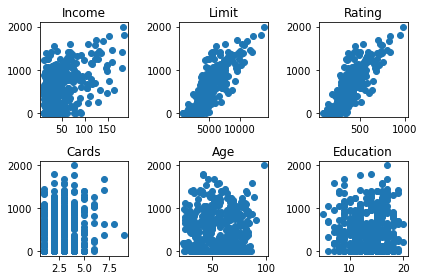

In [16]:
plt.subplot(2,3,1)
plt.scatter(df.Income,df.Balance)
plt.title("Income")
plt.subplot(2,3,2)
plt.scatter(df.Limit,df.Balance)
plt.title("Limit")
plt.subplot(2,3,3)
plt.scatter(df.Rating,df.Balance)
plt.title("Rating")
plt.subplot(2,3,4)
plt.scatter(df.Cards,df.Balance)
plt.title("Cards")
plt.subplot(2,3,5)
plt.scatter(df.Age,df.Balance)
plt.title("Age")
plt.subplot(2,3,6)
plt.scatter(df.Education,df.Balance)
plt.title("Education")

plt.tight_layout()  # 자동으로 레이아웃을 맞춰주는 함수

#### 3)의 상관계수에서 확인한 바와 같이 Limit와 Rating이 Balance와 강한 상관관계를 보인다. 즉, Limit와 Rating 값이 커질수록 Balance가 커지는 경향이 있다. Income 엮시 그 값이 커질수록 대체로 Balance가 커지지만 그 경향이 강하지는 않다.

<br><br>

### 5) Rating(신용점수) 변수를 특성으로 하고 Balance(잔고) 변수를 레이블로 하는 단순선형회귀모형을 훈련하고 산점도에 회귀직선식을 표시하고 이 모형의 결정계수(R^2)을 구하시오.

In [17]:
from sklearn.linear_model import LinearRegression

logistic=LinearRegression()
x=df.Rating.to_numpy()
x=x.reshape(-1,1) # ex) 길이가 12인 배열 -> x.reshape(-1,1)을 보았을 때, 열이 1로 정해졌으니 12개의 행이 만들어 진다,
# x.reshape(-1,2)을 보았을 때, 열이 2로 정해졌으니 6개의 행이 만들어진다.
y=df.Balance.to_numpy().reshape(-1,1) 
logistic.fit(x,y)

print(logistic.coef_,logistic.intercept_) # 계수: model.coef_, 절편: model.intercept_
pred=logistic.predict(x) # predict() 함수를 가지고 예측을 수행
score=logistic.score(x,y)

[[2.56624033]] [-390.84634179]


In [18]:
score 

0.7458484180585037

Text(0.5, 1.0, 'Rating vs Balance(R^2 = 74.58%)')

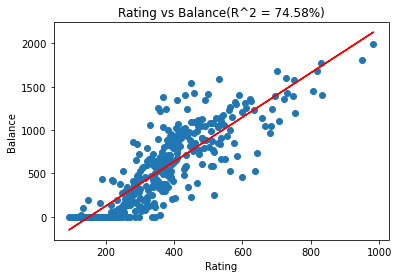

In [19]:
plt.scatter(x,y)
plt.xlabel('Rating')
plt.ylabel('Balance')
plt.plot(x,pred,c="red")
plt.title('Rating vs Balance' + '(R^2 = '+ str(round(score,4)*100) + '%)') # 

In [20]:
logistic.score(x,y) # 결정 계수(R^2), 

0.7458484180585037

* 결정계수의 의미 : Rating으로 Balance(에 있는 변동)의 74.58%를 설명함
    * 회귀모델이 주어진 자료에 얼마나 적합한지를 평가하는 지표
    * y의 변동량대비 모델 예측값의 변동량을 의미함
    * 0~1의 값을 가지며, 상관관계가 높을수록 1에 가까워짐
    * r2=0.3인 경우 약 30% 정도의 설명력을 가진다 라고 해석할 수 있음

<br>
* 회귀직선식 : Balance = 390.85+2.57(Rating) ????

<br>

## 6)

<br>

####  수치형 특성들만 포함하여 데이터를 훈련용과 테스트용으로 7:3으로 분할(random_state=0)하여 선형회귀모형을 훈련시키고, 
#### 훈련데이터와 테스트데이터에 대한 결정계수를 구하시오. 

#### 과대적합이나 과소적합이 의심되는지 코멘트 하시오. 
#### Income이 100, Limit가 6000, Rating이 550, Card가 5개, 나이가 55, 교육년수가 20인 사람의 잔고를 예측하시오.

In [21]:
num_feat # 위에서 뽑아 놓은거

['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']

In [22]:
X=df.drop(['Gender','Student','Married','Balance','Ethnicity'],axis=1).to_numpy()
y=df['Balance'].to_numpy()

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

In [24]:
new_logistic=LinearRegression()
new_logistic.fit(X_train,y_train)
print(new_logistic.coef_,new_logistic.intercept_)

[-7.90523312  0.15976222  1.56900826 14.42490726 -0.60836095  2.94113733] -486.65943641918363


In [25]:
new_logistic.score(X_train,y_train) # 훈련데이터 결정계수

0.8857073035585357

In [26]:
new_logistic.score(X_test,y_test) # 테스트데이터 결정계수

0.8557914117915564

* 훈련데이터에 대한 결정계수가 0.8857로서 비교적 1에 가까우므로 과소적합이라고 할 수 없다. 또한 테스트셋에 대한 결정계수가 트레이닝셋에 대한 결정계수와 크게 차이가 나지 않으므로 과대적합은 아니라고 할 수 있다.

<br>

* 다만, Limit 특성과 Rating 특성이 거의 유사한 특성이므로 회귀모형에 두 특성 중 하나만 포함시킨 조금 더 단순한 모형을 고려해 볼 수는 있다.

<br>

* predict 메서드는 2차원 배열(혹은 리스트)을 인수로 하므로 주의=>아래 두 방법 중 하나 사용

In [27]:
test=np.array(['100','6000','550','5','55','20'],dtype=float).reshape(1,-1)
test

array([[1.0e+02, 6.0e+03, 5.5e+02, 5.0e+00, 5.5e+01, 2.0e+01]])

In [28]:
new_logistic.predict(test) # 잔고 예측

array([641.83257176])

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA

In [30]:
with open('HW4.csv') as f:
    for _ in range(3):
        print(f.readline())

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"

30;"unemployed";"married";"primary";"no";1787;"no";"no";"cellular";19;"oct";79;1;-1;0;"unknown";"no"

33;"services";"married";"secondary";"no";4789;"yes";"yes";"cellular";11;"may";220;1;339;4;"failure";"no"



In [31]:
df = pd.read_csv('HW4.csv', sep=';')

In [32]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### day와 month 칼럼 삭제

In [33]:
df =df.drop(['day','month'],axis=1)

In [34]:
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,129,4,211,3,other,no


### 수치형 특성과 범주형 특성 리스트 구하기

In [35]:
# 방법 1, 노가다로 직접 구하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   duration   4521 non-null   int64 
 10  campaign   4521 non-null   int64 
 11  pdays      4521 non-null   int64 
 12  previous   4521 non-null   int64 
 13  poutcome   4521 non-null   object
 14  y          4521 non-null   object
dtypes: int64(6), object(9)
memory usage: 529.9+ KB


In [36]:
num_feat = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
cat_feat = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

In [37]:
# 방법 2, 코드로 구하기
cat_feat = [name for name in list(df.columns) if df[name].dtype=='object' and name != 'y']
num_feat = [name for name in list(df.columns) if name not in cat_feat and name != 'y']

### 2) 레이블 y의 범주별 비율 구하기

In [38]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [39]:
df.y.value_counts() / df.shape[0]   # df.shape[0] : 행 개수 세기

no     0.88476
yes    0.11524
Name: y, dtype: float64

### 3) 수치형 특성의 요약 통계 구하기

In [40]:
df[num_feat].describe()   #df.describe()도 동일한 결과를 줌

,age,balance,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


### 범주형 특성의 막대 그래프 구하기 (랜덤한 막대 색깔)

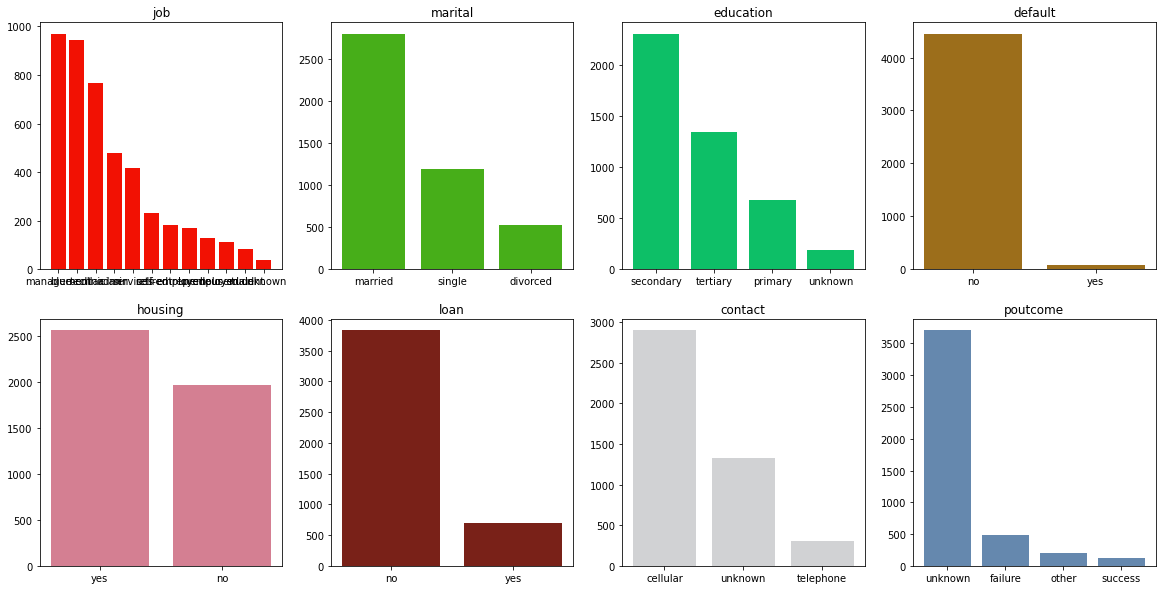

In [49]:
plt.figure(figsize=(20,10))
i = 1
for name in cat_feat:
    counts = df[name].value_counts()
    plt.subplot(2,4,i)
    c = (np.random.random(), np.random.random(), np.random.random()) # np.random.random() : 0~1보다 작은 값의 범주
    plt.bar(counts.index, counts.values, color=c)
    plt.title(name)
    i = i+1
    
#  ex) counts.values : array([3705,  490,  197,  129], dtype=int64)   
#  ex) counts.index  : Index(['unknown', 'failure', 'other', 'success'], dtype='object')

### 4) 특성행렬과 레이블 벡터 구하기

In [50]:
features = df.drop('y', axis = 1)
label = df['y']

### 레이블 인코딩('yes'는 0, 'no'는 1)

In [51]:
#방법 1 : np.where()함수 이용하기
y = np.where(label=='no', 1, 0)

In [52]:
#방법 2 : Series의 map(딕셔너리) 메서드 이용하기
d = {'yes':0, 'no':1}
y = label.map(d).to_numpy()

In [53]:
#방법 3 : LabelEncoder() 이용하기
encoder = LabelEncoder()
encoder.fit(label)   #['no', 'yes']=>[0,1] 알파벳 순
y = 1-encoder.transform(label)  #코드값 조정 

In [54]:
y[50:100]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0])

### 특성행렬의 범주형 특성 원-핫-인코딩

In [55]:
features_dummy = pd.get_dummies(features)

In [56]:
features_dummy

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,33,4789,220,1,339,4,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
2,35,1350,185,1,330,1,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
3,30,1476,199,4,-1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,59,0,226,1,-1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,329,5,-1,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
4517,57,-3313,153,1,-1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4518,57,295,151,11,-1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4519,28,1137,129,4,211,3,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [57]:
X = features_dummy.to_numpy()

In [59]:
X

array([[  30, 1787,   79, ...,    0,    0,    1],
       [  33, 4789,  220, ...,    0,    0,    0],
       [  35, 1350,  185, ...,    0,    0,    0],
       ...,
       [  57,  295,  151, ...,    0,    0,    1],
       [  28, 1137,  129, ...,    1,    0,    0],
       [  44, 1136,  345, ...,    1,    0,    0]], dtype=int64)

In [60]:
# 데이터 분할 후 표준화

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=0)

In [62]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)